<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 8.2: Working with Text
- Using [NLTK](http://www.nltk.org) (Natural Language Toolkit)
- Using [spaCy](https://spacy.io)

INSTRUCTIONS:
- Run the cells
- Observe and understand the results
- Answer the questions

## Import libraries

In [8]:
## Import Libraries
%matplotlib inline
import matplotlib.pyplot as plt
from collections import Counter

import regex as re
import spacy
import nltk

## Load data

In [10]:
import numpy
numpy.version.version

'1.26.4'

In [13]:
## Loading the data

input_file = '/Users/annaxu/Documents/Data Science/DATA/ncc-1701-D.txt'

with open(input_file, 'r') as f:
    text = f.read()

## Inspect the data

In [16]:
print(text[:1000])

USS Enterprise (NCC-1701-D)

"For five hundred years, every ship that has borne the name of the Enterprise has become a legend. This one is no different."

The USS Enterprise (NCC-1701-D) was a 24th century United Federation of Planets Galaxy Class starship operated by Starfleet, and the fifth Federation ship to bear the name Enterprise. During her career, the Enterprise served as the Federation flagship. The Enterprise was destroyed during the Battle of Veridian III in 2371.

==History==
===Construction and launch===
The Enterprise was built at Utopia Planitia Fleet Yards orbiting Mars in the Solar system. The construction was a massive undertaking, involving thousands of people across disciplines. Construction was supervised by Commander Orfil Quinteros. Dr. Leah Brahms was responsible for much of the Enterprise's warp propulsion system design. Some of the Enterprise's components were derived from technology originally developed on the USS Pegasus.

One of the ship's nacelle tube was

## Work the data
- if necessary or desired
    - remove text or content, e.g. quotes (") or metadata (===)
    - add content or markers, e.g. (#FLAG, --NAME--)
    - remove or convert special symbols, e.g. "é" to "e"
    - remove or convert emoticons

In [19]:
text = re.sub(r'[="]', '', text)
print(text[:1000])

USS Enterprise (NCC-1701-D)

For five hundred years, every ship that has borne the name of the Enterprise has become a legend. This one is no different.

The USS Enterprise (NCC-1701-D) was a 24th century United Federation of Planets Galaxy Class starship operated by Starfleet, and the fifth Federation ship to bear the name Enterprise. During her career, the Enterprise served as the Federation flagship. The Enterprise was destroyed during the Battle of Veridian III in 2371.

History
Construction and launch
The Enterprise was built at Utopia Planitia Fleet Yards orbiting Mars in the Solar system. The construction was a massive undertaking, involving thousands of people across disciplines. Construction was supervised by Commander Orfil Quinteros. Dr. Leah Brahms was responsible for much of the Enterprise's warp propulsion system design. Some of the Enterprise's components were derived from technology originally developed on the USS Pegasus.

One of the ship's nacelle tube was the site of

## Helper method

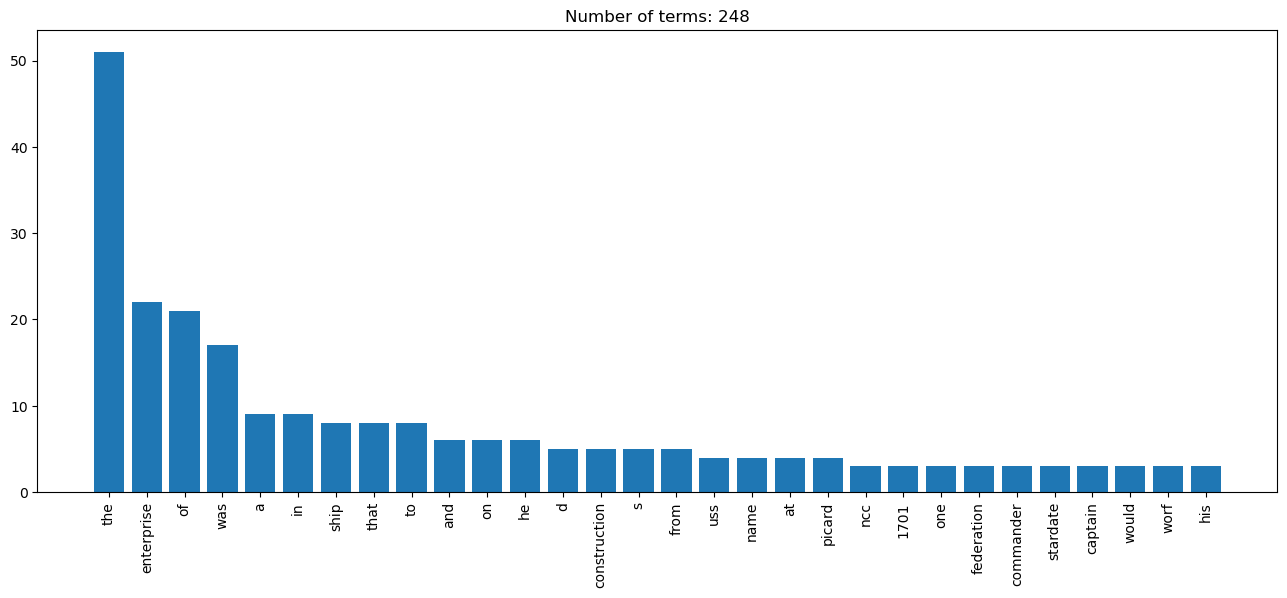

In [22]:
# create a bar chart of the frequency of the words in the text

tokens = re.findall(r'\w+', text.lower()) #separate all words and lower-case 

def plot_words(tokens, top = 30):
    tokens_counter = Counter(tokens) #counts how many times each word appears in the tokens list
    tok = [t for (t, _) in tokens_counter.most_common()] #holds top words from (word, count) tuple sorted from most to least frequent
    val = [v for (_, v) in tokens_counter.most_common()] #holds top counts from (word, count) tuple sorted from most to least frequent

    plt.figure(figsize = (16, 6))
    plt.bar(tok[:top], val[:top])
    plt.title('Number of terms: %d' % len(tokens_counter))
    plt.xticks(rotation = 90)
    
    plt.show()

plot_words(tokens)

## spaCy model invocation and text processing
spaCy does the processing of the text as part of the reading of the data.

In [25]:
# load spaCy and the English model
!python -m spacy download en_core_web_sm
nlp = spacy.load('en_core_web_sm')

# process the text
doc = nlp(text)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 8.5 MB/s eta 0:00:00a 0:00:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


## Tokenise

In [27]:
# only show the results
# spaCy has done it already
for i, t in enumerate(doc):
    print('%2d| %r' % (i+1, t.text)) #prints token number with formatting and string in '' marks
    if t.text == '.': #stop at a full stop
        break

 1| 'USS'
 2| 'Enterprise'
 3| '('
 4| 'NCC-1701'
 5| '-'
 6| 'D'
 7| ')'
 8| '\n\n'
 9| 'For'
10| 'five'
11| 'hundred'
12| 'years'
13| ','
14| 'every'
15| 'ship'
16| 'that'
17| 'has'
18| 'borne'
19| 'the'
20| 'name'
21| 'of'
22| 'the'
23| 'Enterprise'
24| 'has'
25| 'become'
26| 'a'
27| 'legend'
28| '.'


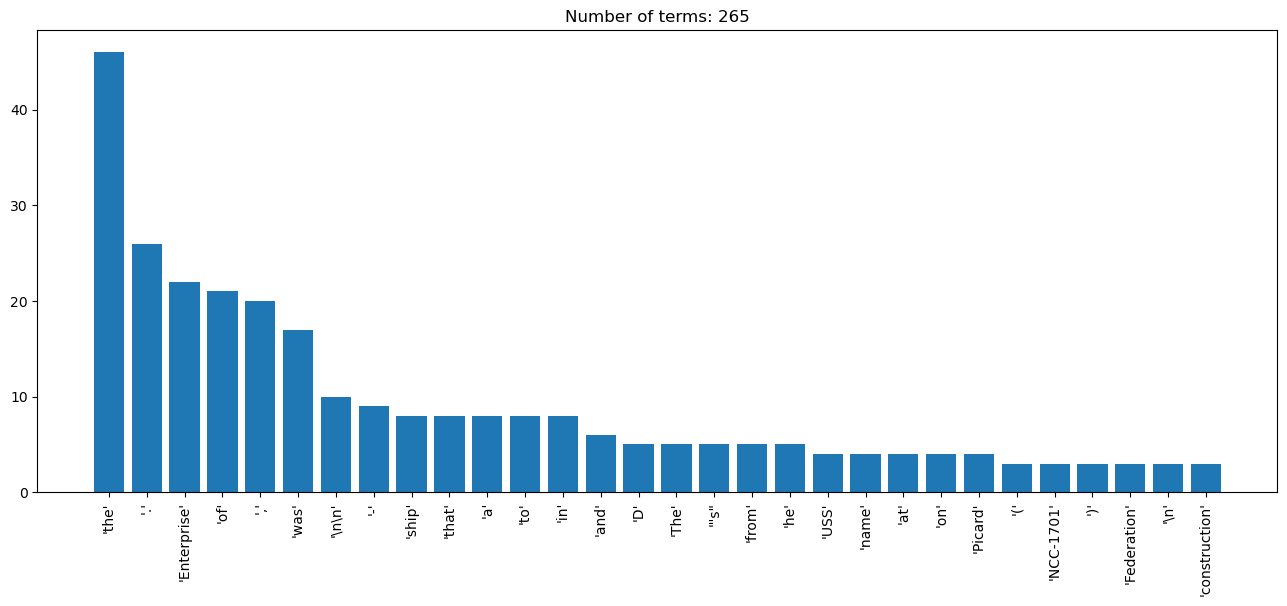

In [28]:
plot_words(['%r' % t.text for t in doc]) #for each token in doc (SpaCy object), represent text in '' marks

### Stop Words

In [30]:
## spaCy
print('i | with stop words without')
print('--| --------------- ------------')

# for all the tokens
for i, t in enumerate(doc):
    print('%2d| %-15r %r' % (i+1, t.text, ('' if t.is_stop else t.text))) 
    #%2d = format an integer with at least 2 digits, right-aligned, starting from 1
    #%-15r = represent 15 characters, left-aligned, inside '' marks
    #%r = print '' if t.is.stop - stop words are common words in language that are filtered out in NLP tasks to reduce clutter and decrease computational cost 
    #(i+1, t.text, ('' if t.is_stop else t.text))) = print 3 columns: 1 index, 1 with every token, 1 without stop words

    # break after the first sentence
    if t.text == '.':
        break

i | with stop words without
--| --------------- ------------
 1| 'USS'           'USS'
 2| 'Enterprise'    'Enterprise'
 3| '('             '('
 4| 'NCC-1701'      'NCC-1701'
 5| '-'             '-'
 6| 'D'             'D'
 7| ')'             ')'
 8| '\n\n'          '\n\n'
 9| 'For'           ''
10| 'five'          ''
11| 'hundred'       ''
12| 'years'         'years'
13| ','             ','
14| 'every'         ''
15| 'ship'          'ship'
16| 'that'          ''
17| 'has'           ''
18| 'borne'         'borne'
19| 'the'           ''
20| 'name'          ''
21| 'of'            ''
22| 'the'           ''
23| 'Enterprise'    'Enterprise'
24| 'has'           ''
25| 'become'        ''
26| 'a'             ''
27| 'legend'        'legend'
28| '.'             '.'


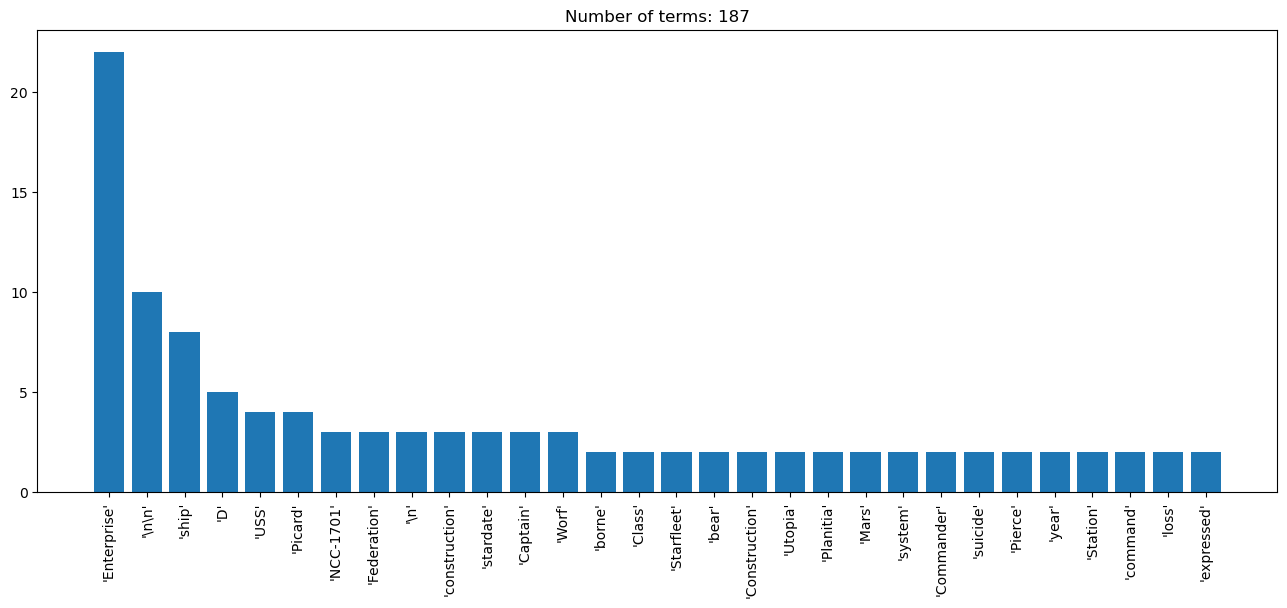

In [31]:
plot_words(['%r' % t.text for t in doc if not (t.is_stop | t.is_punct)]) #for each token in doc (SpaCy object), represent text in '' marks if it's not a stop word or punctuation

### Check Part of Speech

In [33]:
## spaCy
for i, t in enumerate(doc):
    print('%2d|%-12r : %-5s %s' % (i+1, t.text, t.pos_, t.tag_))
    #%-5s = print 5 characters of t.pos_, left-aligned
    #t.pos_ = course-grained part-of-speech tag (universal POS tags) are broad categories that classify words into 17 broad grammatical groups e.g. noun, verb adjective
    #%s = print t.tag, no formatting
    #t.tag = fine-grained part-of-speech tag (language-specific tags) provide detailed grammatical info e.g. NN = noun, singular; NNS = noun, plural
    #For English, spaCy uses the Penn Treebank POS tag set which has 36 fine-grained POS tags
    if t.text == '.':
        break

 1|'USS'        : PROPN NNP
 2|'Enterprise' : PROPN NNP
 3|'('          : PUNCT -LRB-
 4|'NCC-1701'   : PROPN NNP
 5|'-'          : PUNCT HYPH
 6|'D'          : NOUN  NN
 7|')'          : PUNCT -RRB-
 8|'\n\n'       : SPACE _SP
 9|'For'        : ADP   IN
10|'five'       : NUM   CD
11|'hundred'    : NUM   CD
12|'years'      : NOUN  NNS
13|','          : PUNCT ,
14|'every'      : DET   DT
15|'ship'       : NOUN  NN
16|'that'       : PRON  WDT
17|'has'        : AUX   VBZ
18|'borne'      : VERB  VBN
19|'the'        : DET   DT
20|'name'       : NOUN  NN
21|'of'         : ADP   IN
22|'the'        : DET   DT
23|'Enterprise' : NOUN  NN
24|'has'        : AUX   VBZ
25|'become'     : VERB  VBN
26|'a'          : DET   DT
27|'legend'     : NOUN  NN
28|'.'          : PUNCT .


### Lemmatisation

In [35]:
## spaCy
print('i | Token        Lemma')
print('--| ------------ ------------')
for i, t in enumerate(doc):
    print('%2d| %-12r %r' % (i+1, t.text, t.lemma_)) 
    #lemmatisation is the process of reducing a word to its base or dictionary form, called a lemma e.g. am/is/are -> be, running/ran -> run, better -> good
    if t.text == '.':
        break

i | Token        Lemma
--| ------------ ------------
 1| 'USS'        'USS'
 2| 'Enterprise' 'Enterprise'
 3| '('          '('
 4| 'NCC-1701'   'NCC-1701'
 5| '-'          '-'
 6| 'D'          'd'
 7| ')'          ')'
 8| '\n\n'       '\n\n'
 9| 'For'        'for'
10| 'five'       'five'
11| 'hundred'    'hundred'
12| 'years'      'year'
13| ','          ','
14| 'every'      'every'
15| 'ship'       'ship'
16| 'that'       'that'
17| 'has'        'have'
18| 'borne'      'bear'
19| 'the'        'the'
20| 'name'       'name'
21| 'of'         'of'
22| 'the'        'the'
23| 'Enterprise' 'enterprise'
24| 'has'        'have'
25| 'become'     'become'
26| 'a'          'a'
27| 'legend'     'legend'
28| '.'          '.'


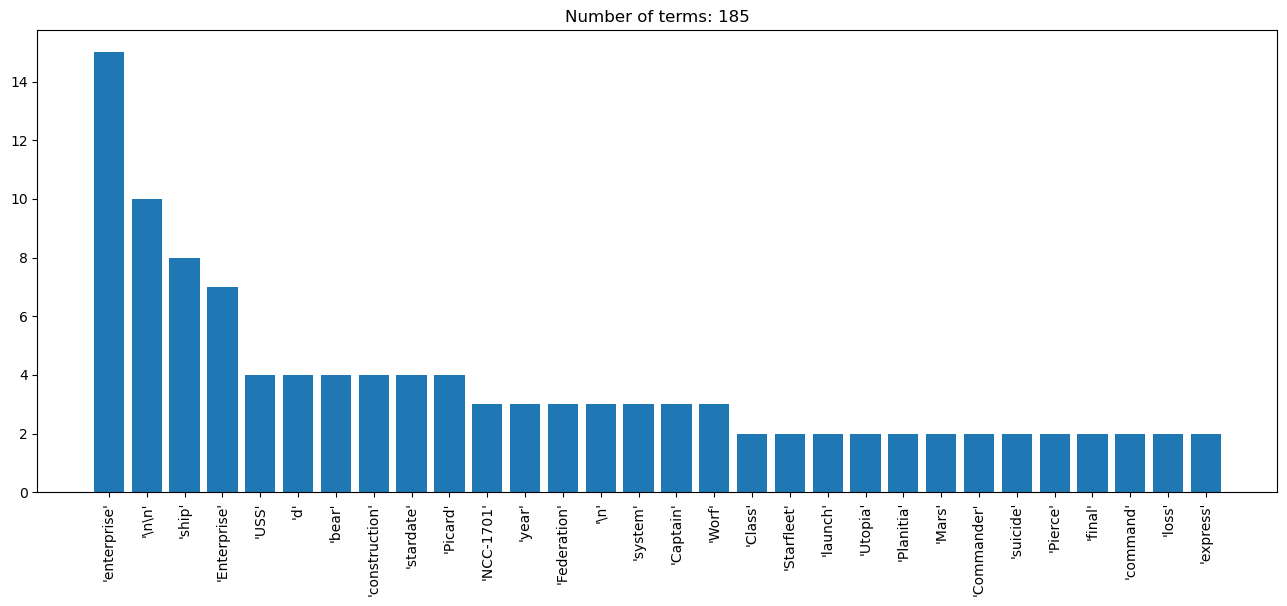

In [36]:
plot_words(['%r' % t.lemma_ for t in doc if not (t.is_stop | t.is_punct)]) #for each token in doc (SpaCy object), represent lemma in '' marks if it's not a stop word or punctuation

### Entity Recognition

In [38]:
## spaCy
for i, s in enumerate(doc.sents):
    print('%2d: %s' % (i, re.sub(r'\n+', '', s.text))) #prints index and sentence
    #/n+ = match any newline characters = a special, invisible character that tells the computer to move to the next line
    if s.as_doc().ents: #turns the sentence into a separate spaCy Doc object and gets the named entities in that sentence
        #name entity is a real-world object that has a specific name and recognised as a single unit in a sentence e.g. person, place, organisation, date, product, event
        print('-'*80)
        for e in s.as_doc().ents: #for all named entities in the sentence
            print('%-11s: %s' % (e.label_, re.sub(r'\n+', '', e.text))) #print 11 characters of the entity label, left-aligned with a colon, then the entity text, removing any newline characters
    print('='*80)

 0: USS Enterprise (NCC-1701-D)
--------------------------------------------------------------------------------
ORG        : USS Enterprise
 1: For five hundred years, every ship that has borne the name of the Enterprise has become a legend.
--------------------------------------------------------------------------------
DATE       : five hundred years
ORG        : Enterprise
 2: This one is no different.
 3: The USS Enterprise (NCC-1701-D) was a 24th century United Federation of Planets Galaxy Class starship operated by Starfleet, and the fifth Federation ship to bear the name Enterprise.
--------------------------------------------------------------------------------
ORG        : The USS Enterprise
DATE       : a 24th century
ORG        : United Federation of Planets Galaxy
ORDINAL    : fifth
 4: During her career, the Enterprise served as the Federation flagship.
--------------------------------------------------------------------------------
ORG        : Enterprise
ORG        : Fe

## Extra: Using NLTK for NLP

### Tokenise

In [62]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/annaxu/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [70]:
# use nltk to find tokens
tokens = nltk.word_tokenize(text)

for i, t in enumerate(tokens[:25]): #loop over the first 25 tokens
    print('%2d| %r' % (i+1, t)) #prints token number with formatting and the string token

 1| 'USS'
 2| 'Enterprise'
 3| '('
 4| 'NCC-1701-D'
 5| ')'
 6| 'For'
 7| 'five'
 8| 'hundred'
 9| 'years'
10| ','
11| 'every'
12| 'ship'
13| 'that'
14| 'has'
15| 'borne'
16| 'the'
17| 'name'
18| 'of'
19| 'the'
20| 'Enterprise'
21| 'has'
22| 'become'
23| 'a'
24| 'legend'
25| '.'


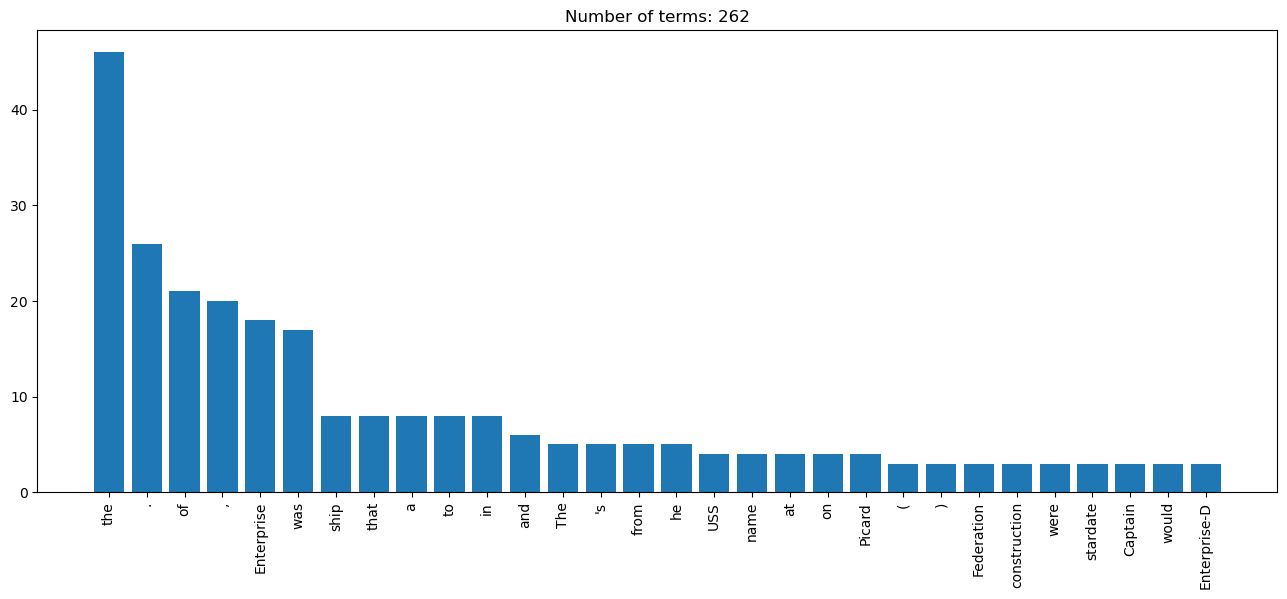

In [55]:
plot_words(tokens)

### Stop words

In [58]:
#Print stopwords from nlkt stopwords
stopWords = nltk.corpus.stopwords.words('english')
stopWords.sort()
print(', '.join(stopWords))

a, about, above, after, again, against, ain, all, am, an, and, any, are, aren, aren't, as, at, be, because, been, before, being, below, between, both, but, by, can, couldn, couldn't, d, did, didn, didn't, do, does, doesn, doesn't, doing, don, don't, down, during, each, few, for, from, further, had, hadn, hadn't, has, hasn, hasn't, have, haven, haven't, having, he, he'd, he'll, he's, her, here, hers, herself, him, himself, his, how, i, i'd, i'll, i'm, i've, if, in, into, is, isn, isn't, it, it'd, it'll, it's, its, itself, just, ll, m, ma, me, mightn, mightn't, more, most, mustn, mustn't, my, myself, needn, needn't, no, nor, not, now, o, of, off, on, once, only, or, other, our, ours, ourselves, out, over, own, re, s, same, shan, shan't, she, she'd, she'll, she's, should, should've, shouldn, shouldn't, so, some, such, t, than, that, that'll, the, their, theirs, them, themselves, then, there, these, they, they'd, they'll, they're, they've, this, those, through, to, too, under, until, up, v

In [92]:
#Print a list of tokens without the stop words 
# NOTE: see the `.lower()` method applied to token
tokens_no_stop = [t for t in tokens if t.lower() not in stopWords]

for i, t in enumerate(tokens_no_stop[:25]):  # loop over first 25 non-stopword tokens
    print('%2d| %r' % (i+1, t))  

 1| 'USS'
 2| 'Enterprise'
 3| '('
 4| 'NCC-1701-D'
 5| ')'
 6| 'five'
 7| 'hundred'
 8| 'years'
 9| ','
10| 'every'
11| 'ship'
12| 'borne'
13| 'name'
14| 'Enterprise'
15| 'become'
16| 'legend'
17| '.'
18| 'one'
19| 'different'
20| '.'
21| 'USS'
22| 'Enterprise'
23| '('
24| 'NCC-1701-D'
25| ')'


In [94]:
i = 0
j = 0

print('i | with stop words without')
print('--| --------------- ------------')

while i < len(tokens): #for all the tokens
    if tokens[i] == tokens_no_stop[j]: #same word
        print('%2d| %-15r %r' % (i+1, tokens[i], tokens_no_stop[j]))
        j += 1
    else: # not the same word
        print('%2d| %-15r' % (i+1, tokens[i]))

    i += 1 #next word
    if tokens[i-1] == '.': # break after the sentence with '.'
        break

i | with stop words without
--| --------------- ------------
 1| 'USS'           'USS'
 2| 'Enterprise'    'Enterprise'
 3| '('             '('
 4| 'NCC-1701-D'    'NCC-1701-D'
 5| ')'             ')'
 6| 'For'          
 7| 'five'          'five'
 8| 'hundred'       'hundred'
 9| 'years'         'years'
10| ','             ','
11| 'every'         'every'
12| 'ship'          'ship'
13| 'that'         
14| 'has'          
15| 'borne'         'borne'
16| 'the'          
17| 'name'          'name'
18| 'of'           
19| 'the'          
20| 'Enterprise'    'Enterprise'
21| 'has'          
22| 'become'        'become'
23| 'a'            
24| 'legend'        'legend'
25| '.'             '.'


In [99]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [105]:
tokens_no_punc = [t for t in tokens_no_stop if t not in string.punctuation]

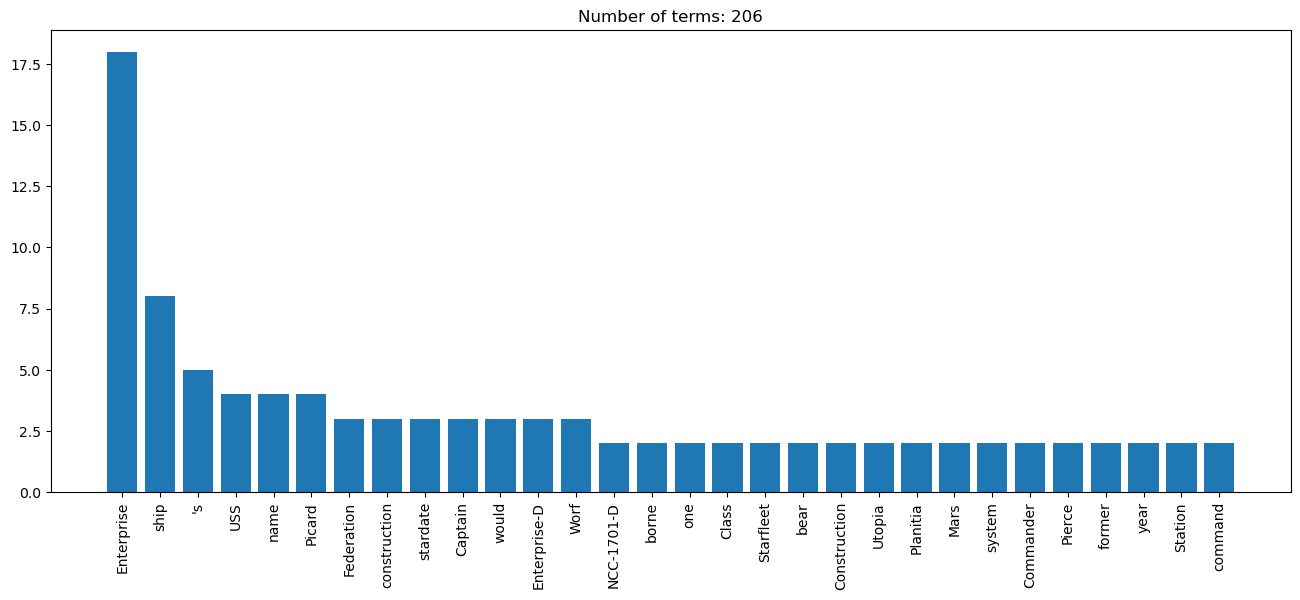

In [107]:
# Create plot of words without stop words or punctuation
plot_words(tokens_no_punc)

### Check Part of Speech

In [109]:
# define PoS
pos_list = {
    'CC':   'coordinating conjunction',
    'CD':   'cardinal digit',
    'DT':   'determiner',
    'EX':   'existential there (like: "there is" ... think of it like "there exists")',
    'FW':   'foreign word',
    'IN':   'preposition/subordinating conjunction',
    'JJ':   'adjective "big"',
    'JJR':  'adjective, comparative "bigger"',
    'JJS':  'adjective, superlative "biggest"',
    'LS':   'list marker 1)',
    'MD':   'modal could, will',
    'NN':   'noun, singular "desk"',
    'NNS':  'noun plural "desks"',
    'NNP':  'proper noun, singular "Harrison"',
    'NNPS': 'proper noun, plural "Americans"',
    'PDT':  'predeterminer "all the kids"',
    'POS':  'possessive ending parent"s',
    'PRP':  'personal pronoun I, he, she',
    'PRP$': 'possessive pronoun my, his, hers',
    'RB':   'adverb very, silently,',
    'RBR':  'adverb, comparative better',
    'RBS':  'adverb, superlative best',
    'RP':   'particle give up',
    'TO':   'to go "to" the store.',
    'UH':   'interjection errrrrrrrm',
    'VB':   'verb, base form take',
    'VBD':  'verb, past tense took',
    'VBG':  'verb, gerund/present participle taking',
    'VBN':  'verb, past participle taken',
    'VBP':  'verb, sing. present, non-3d take',
    'VBZ':  'verb, 3rd person sing. present takes',
    'WDT':  'wh-determiner which',
    'WP':   'wh-pronoun who, what',
    'WP$':  'possessive wh-pronoun whose',
    'WRB':  'wh-abverb where, when',
}

In [117]:
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /Users/annaxu/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


True

In [119]:
tagged = nltk.pos_tag(tokens) #assigns a PoS to each token

for i, t in enumerate(tagged[:25]): #for the first 25 tagged tokens
    print('%2d|%-12r : %-4s %s' % (i+1, t[0], t[1], (pos_list[t[1]] if t[1] in pos_list else '-'))) #prints token number with token, PoS and PoS description if any

 1|'USS'        : NNP  proper noun, singular "Harrison"
 2|'Enterprise' : NNP  proper noun, singular "Harrison"
 3|'('          : (    -
 4|'NCC-1701-D' : NNP  proper noun, singular "Harrison"
 5|')'          : )    -
 6|'For'        : IN   preposition/subordinating conjunction
 7|'five'       : CD   cardinal digit
 8|'hundred'    : CD   cardinal digit
 9|'years'      : NNS  noun plural "desks"
10|','          : ,    -
11|'every'      : DT   determiner
12|'ship'       : NN   noun, singular "desk"
13|'that'       : WDT  wh-determiner which
14|'has'        : VBZ  verb, 3rd person sing. present takes
15|'borne'      : VBN  verb, past participle taken
16|'the'        : DT   determiner
17|'name'       : NN   noun, singular "desk"
18|'of'         : IN   preposition/subordinating conjunction
19|'the'        : DT   determiner
20|'Enterprise' : NNP  proper noun, singular "Harrison"
21|'has'        : VBZ  verb, 3rd person sing. present takes
22|'become'     : VBN  verb, past participle taken
23|

### Stemming

In [121]:
ps = nltk.porter.PorterStemmer() #create an instance of Porter Stemmer, which removes word suffixes e.g. 'running' -> 'run'
stemmed = ' '.join([ps.stem(word) for word in text.split()]) #applies stemming to each word and joins the result into one string

### Lemmatisation

In [126]:
nltk.download('wordnet')
wl = nltk.stem.WordNetLemmatizer()
lemma = ' '.join([wl.lemmatize(word) for word in text.split()]) #applies lemmatising to each word and joins the result into one string

[nltk_data] Downloading package wordnet to /Users/annaxu/nltk_data...


In [131]:
dot = stemmed.find('.') + 1
sl = stemmed[:dot].split()
dot = lemma.find('.') + 1
ll = lemma[:dot].split()

print('i | Stem           Lemma')
print('--| -------------- ------------')
for i, p in enumerate(zip(sl, ll)): #produce pairs/tuples
    print('%2d| %-12r   %-12r' % (i+1, p[0], p[1])) #prints token number with stemmed version and lemmatised version of the token

i | Stem           Lemma
--| -------------- ------------
 1| 'uss'          'USS'       
 2| 'enterpris'    'Enterprise'
 3| '(ncc-1701-d)'   '(NCC-1701-D)'
 4| 'for'          'For'       
 5| 'five'         'five'      
 6| 'hundr'        'hundred'   
 7| 'years,'       'years,'    
 8| 'everi'        'every'     
 9| 'ship'         'ship'      
10| 'that'         'that'      
11| 'ha'           'ha'        
12| 'born'         'borne'     
13| 'the'          'the'       
14| 'name'         'name'      
15| 'of'           'of'        
16| 'the'          'the'       
17| 'enterpris'    'Enterprise'
18| 'ha'           'ha'        
19| 'becom'        'become'    
20| 'a'            'a'         
21| 'legend.'      'legend.'   


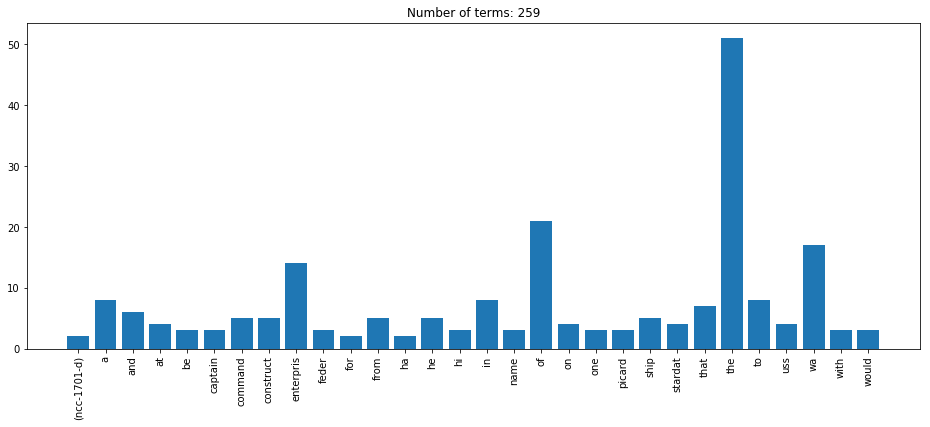

In [ ]:
plot_words(stemmed.split())

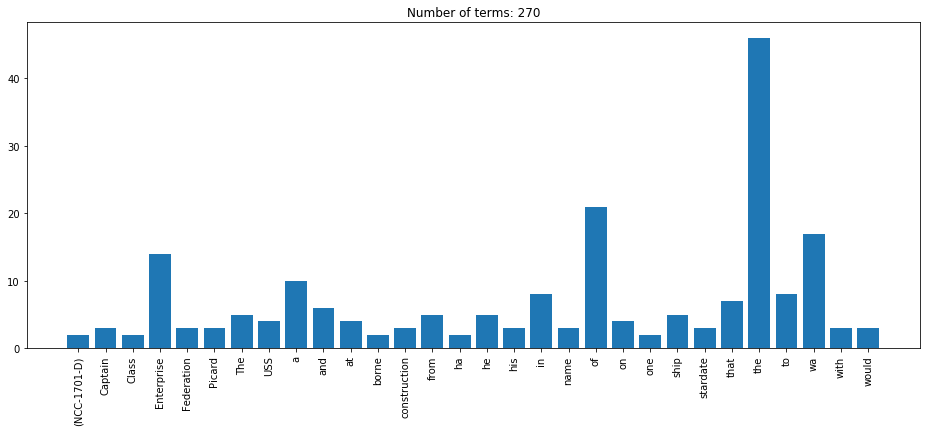

In [ ]:
plot_words(lemma.split())

### Entity recognition

In [137]:
nltk.download('words')
entities = nltk.chunk.ne_chunk(tagged) 
#tagged is from tagged = nltk.pos_tag(tokens)
#returns a chunk tree that recognises when adjacent tokens belong to the same named entity and wraps them inside a tree with the entity label

for e in entities: #loop over each element of the chunk tree
    s = re.sub(r'[\(\)]', '', str(e)) #cleans and converts element to a string
    if s.find('/NNP') > 0: #if string contains a proper noun
        t = s.split()[0] #get chunk type
        n = ' '.join([re.sub(r'/NNP', '', x) for x in s.split()[1:]]) #removes subsequent /NNP after the first one
        print('%-12s: %s' % (t, n)) #prints chunk label and entity

[nltk_data] Downloading package words to /Users/annaxu/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


ORGANIZATION: USS Enterprise
ORGANIZATION: Enterprise
ORGANIZATION: USS Enterprise
PERSON      : United Federation
ORGANIZATION: Planets Galaxy
PERSON      : Starfleet
ORGANIZATION: Enterprise
ORGANIZATION: Federation
ORGANIZATION: Battle
GPE         : Veridian
PERSON      : History Construction
ORGANIZATION: Enterprise
ORGANIZATION: Utopia Planitia Fleet
PERSON      : Mars
ORGANIZATION: Solar
ORGANIZATION: Commander Orfil Quinteros
PERSON      : Brahms
ORGANIZATION: Enterprise
ORGANIZATION: Enterprise
ORGANIZATION: USS Pegasus
ORGANIZATION: Utopia Planitia
PERSON      : Walter Pierce
PERSON      : Marla Finn
PERSON      : William Hodges
PERSON      : Pierce
ORGANIZATION: Enterprise
PERSON      : Mars
ORGANIZATION: Enterprise
ORGANIZATION: Enterprise
FACILITY    : Earth Station McKinley
PERSON      : Captain Jean-Luc Picard
ORGANIZATION: Rear Admiral Norah Satie
PERSON      : Legacy Commander Riker
ORGANIZATION: Enterprise
PERSON      : Picard
PERSON      : Deep Space
GPE         : Sta



---



---



> > > > > > > > > © 2025 Institute of Data


---



---



